# Proyek Analisa Data: [Bike-sharing-dataset.zip]
Nama : Alfianita Ingsiany

Email : alfianitaingsiany03@gmail.com

Id Dicoding : alfianita04


# Pertanyaan Bisnis

1. Bagaimana perilaku pengguna berbeda antara hari kerja dan akhir pekan?

2. Bagaimana faktor cuaca seperti suhu, kelembaban, dan kecepatan angin memengaruhi jumlah penggunaan sepeda?

# Data Wrangling

## Gathering Data 

In [54]:
# # Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [56]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Assesing Data Tabel day_df

In [57]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


# Cleaning Data Tabel day_df

In [58]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [59]:
print("Jumlah Duplikasi: ", day_df.duplicated().sum())

Jumlah Duplikasi:  0


In [60]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Assesing Data Tabel hour_df

In [61]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


# Cleaning Data Tabel hour_df

In [62]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [63]:
print("Jumlah Duplikasi: ", hour_df.duplicated().sum())

Jumlah Duplikasi:  0


In [64]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Exploratory Data Analysis

## Explore Tabel day_df

In [65]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
428,429,2012-03-04,1,1,3,0,0,0,1,0.325833,0.303021,0.403333,0.334571,710,2713,3423
506,507,2012-05-21,2,1,5,0,1,1,2,0.598333,0.565667,0.811250,0.233204,630,3729,4359
132,133,2011-05-13,2,0,5,0,5,1,2,0.512500,0.494300,0.863333,0.179725,692,3413,4105
527,528,2012-06-11,2,1,6,0,1,1,2,0.720833,0.659721,0.587917,0.207713,1017,5647,6664
620,621,2012-09-12,3,1,9,0,3,1,1,0.599167,0.570075,0.577083,0.131846,1050,6820,7870


In [66]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


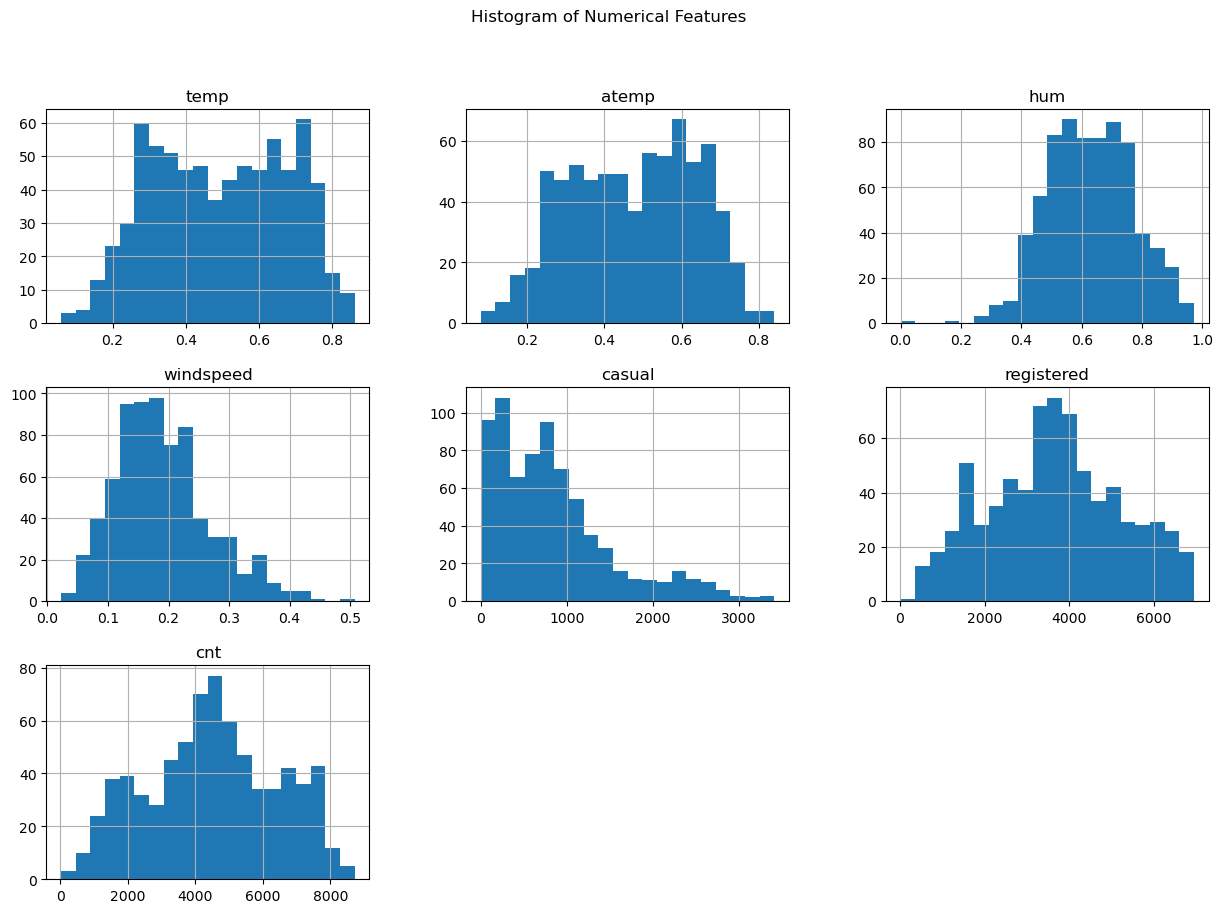

In [67]:
# Visualisasi Distribusi Data
# Histogram Variabel Numerik

numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
day_df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogram of Numerical Features')
plt.show()

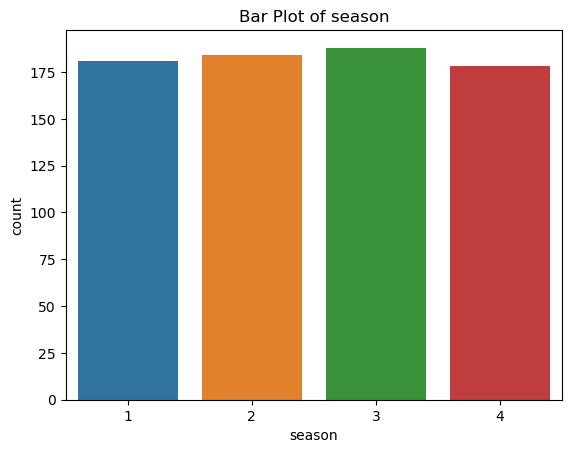

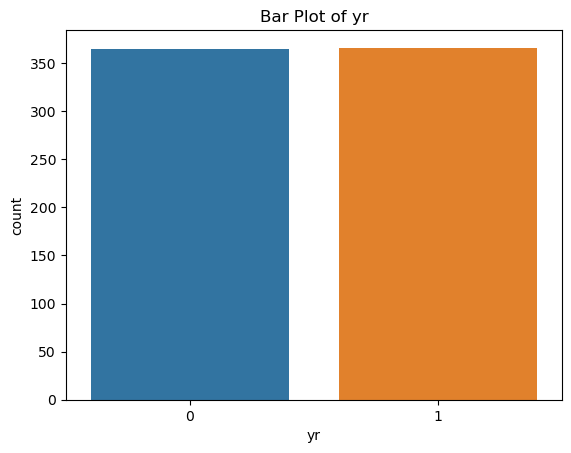

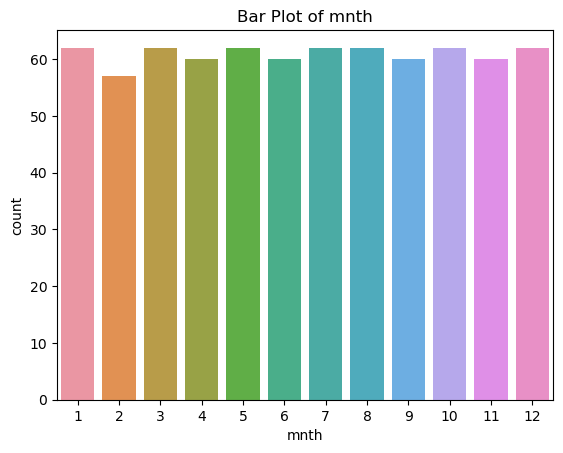

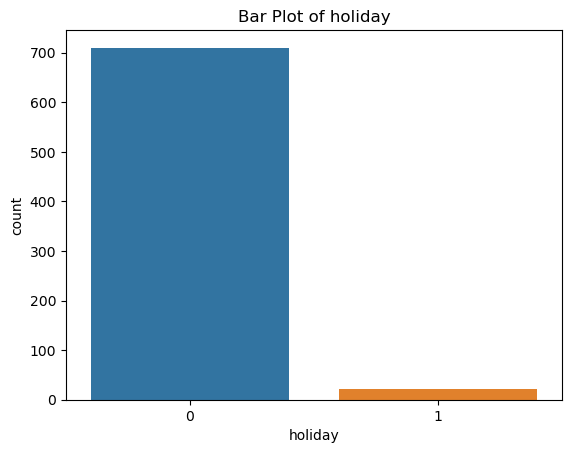

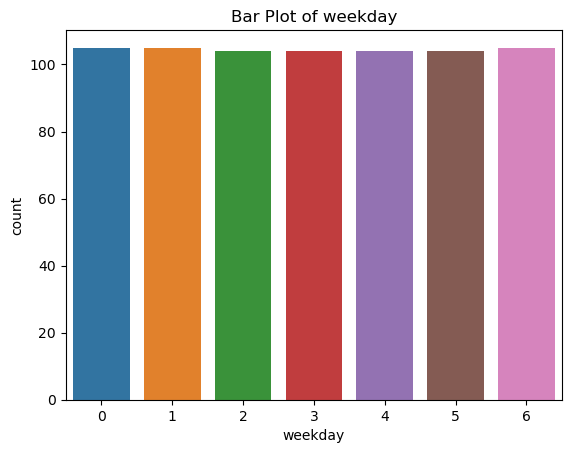

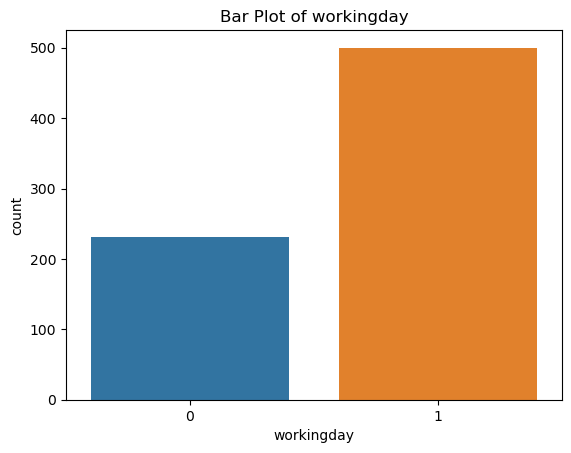

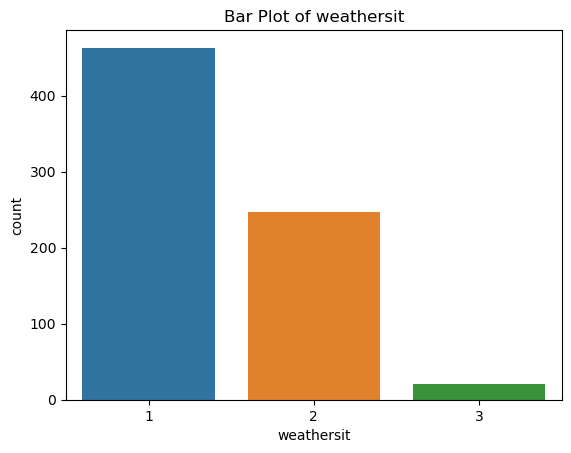

In [68]:
# Bar Plot Variabel Kategorikal

categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for feature in categorical_features:
    sns.countplot(x=feature, data=day_df)
    plt.title(f'Bar Plot of {feature}')
    plt.show()

In [69]:
# Menghapus Kolom 'dteday' untuk menghitung korelasi

day_df_numeric = day_df.drop(columns=['dteday'])

In [70]:
# Menghitung Korelasi 

correlation = day_df_numeric.corr()

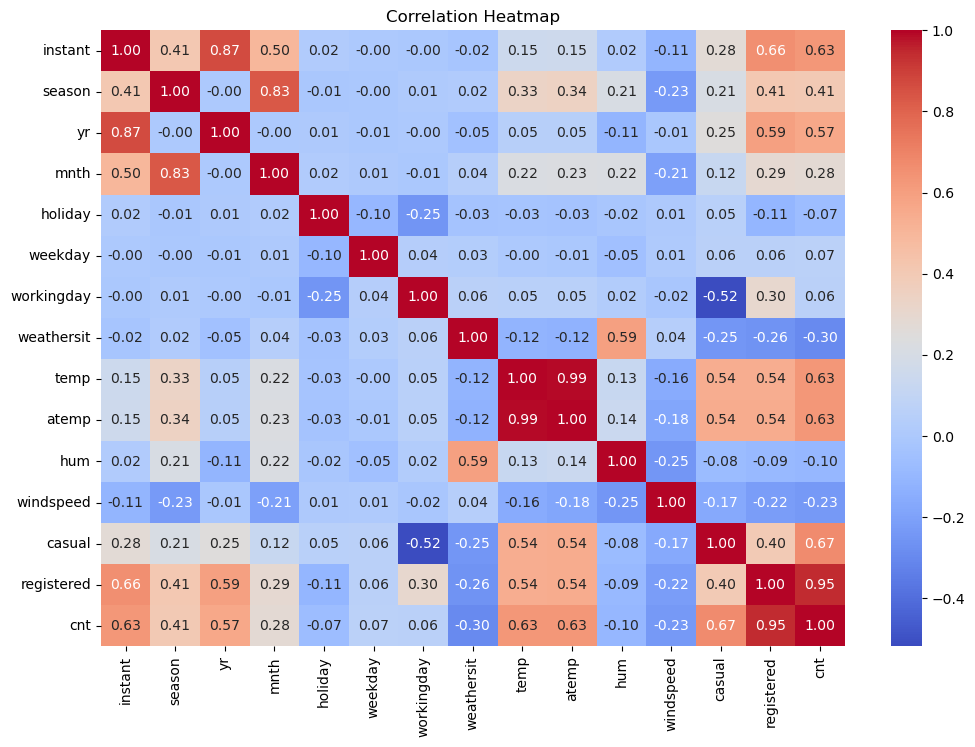

In [71]:
# Plot Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Exploratory Tabel hour_df

In [72]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15526,15527,2012-10-14,4,1,10,3,0,0,0,1,0.42,0.4242,0.77,0.2985,3,25,28
12211,12212,2012-05-29,2,1,5,0,0,2,1,1,0.70,0.6667,0.79,0.1940,12,33,45
2401,2402,2011-04-14,2,0,4,23,0,4,1,1,0.46,0.4545,0.59,0.1045,7,40,47
3439,3440,2011-05-28,2,0,5,5,0,6,0,1,0.56,0.5303,0.88,0.2239,4,3,7
6862,6863,2011-10-18,4,0,10,12,0,2,1,2,0.62,0.6212,0.43,0.0896,42,159,201


In [73]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


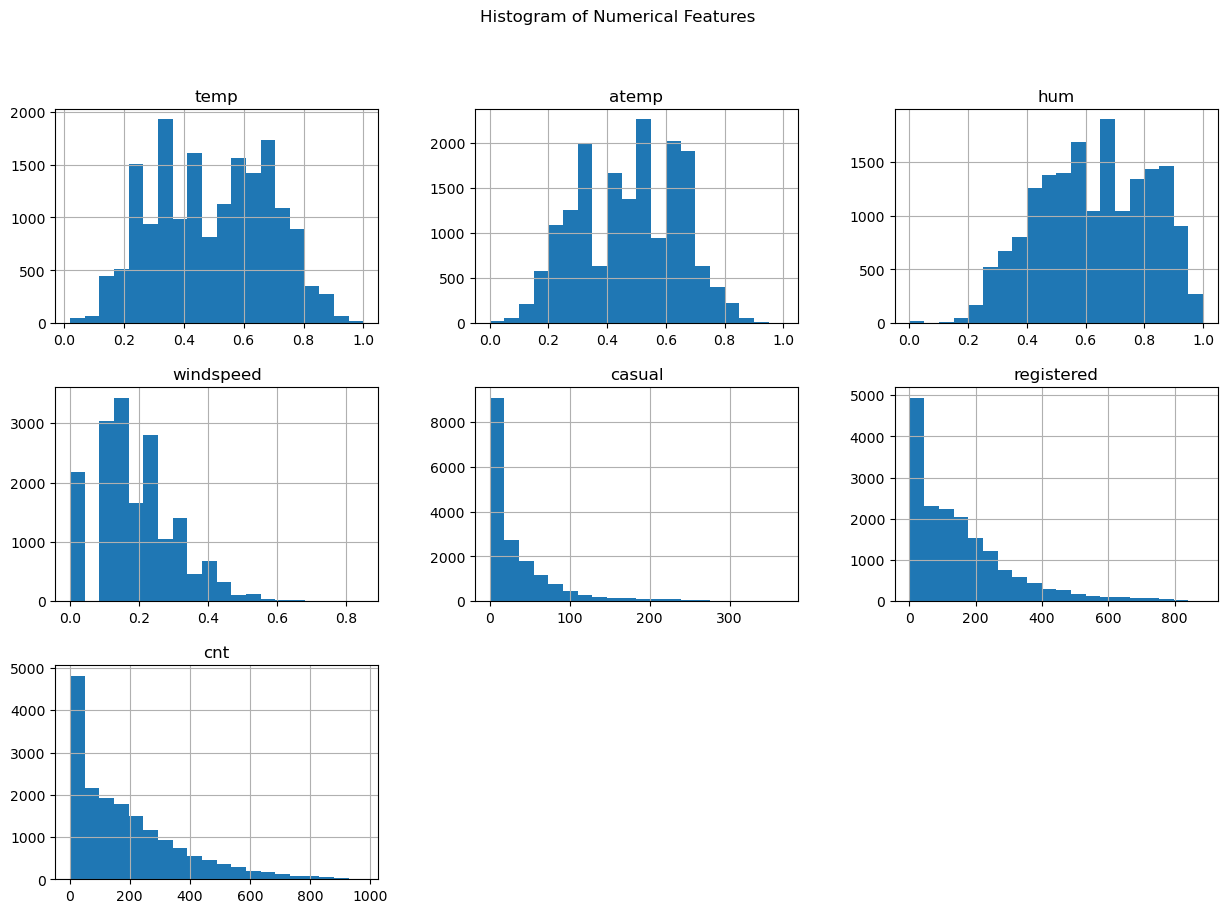

In [74]:
# Analisis Distribusi Data

numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
hour_df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogram of Numerical Features')
plt.show()

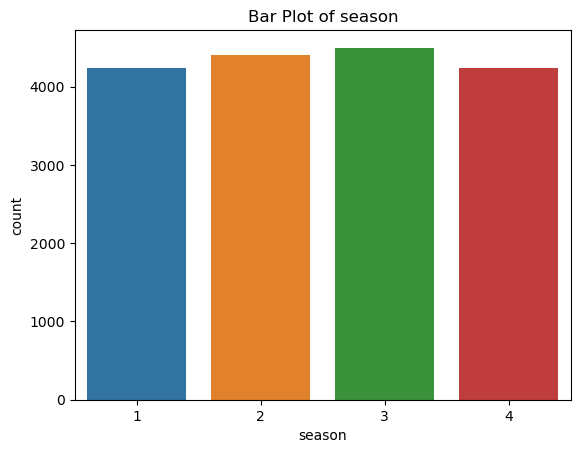

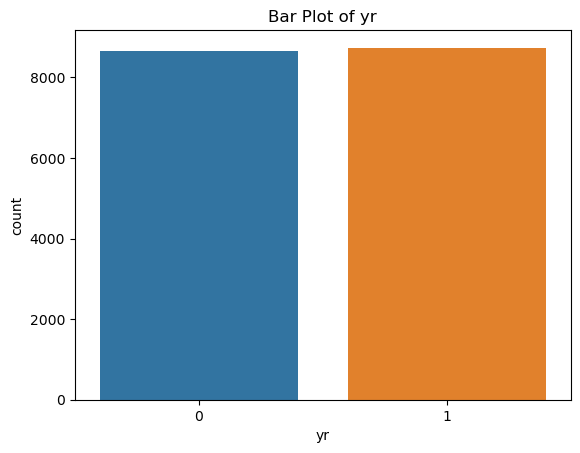

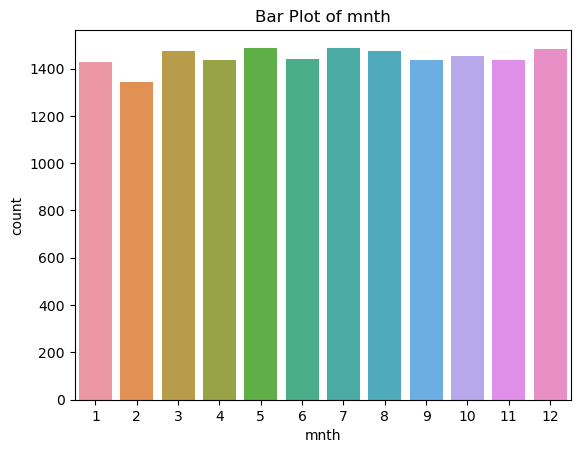

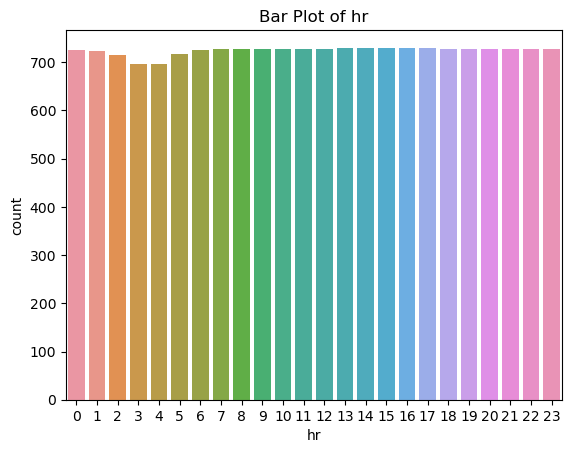

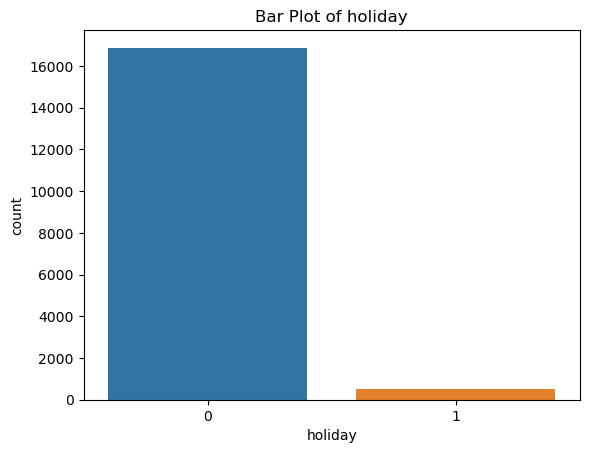

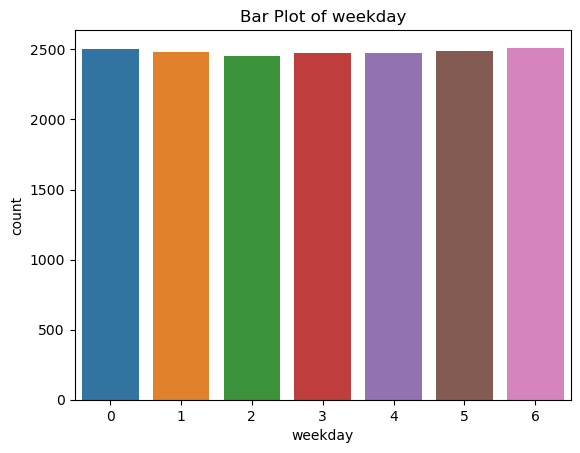

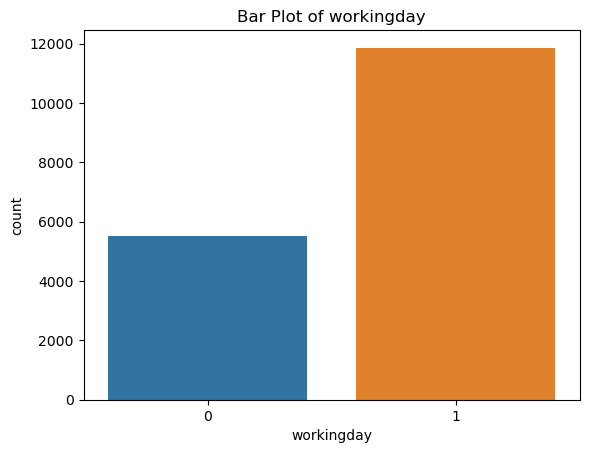

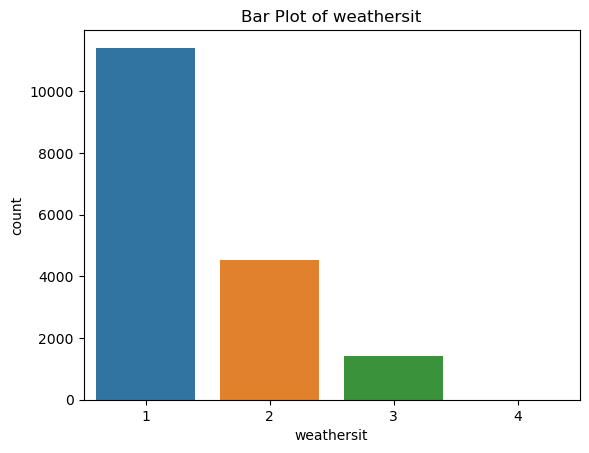

In [75]:
# Bar Plot Variabel Kategorikal

categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for feature in categorical_features:
    sns.countplot(x=feature, data=hour_df)
    plt.title(f'Bar Plot of {feature}')
    plt.show()

In [76]:
# Menghapus Kolom 'dteday' untuk Menghitung Korelasi

hour_df_numeric = hour_df.drop(columns=['dteday'])

In [77]:
# Menghitung Korelasi

correlation = hour_df_numeric.corr()

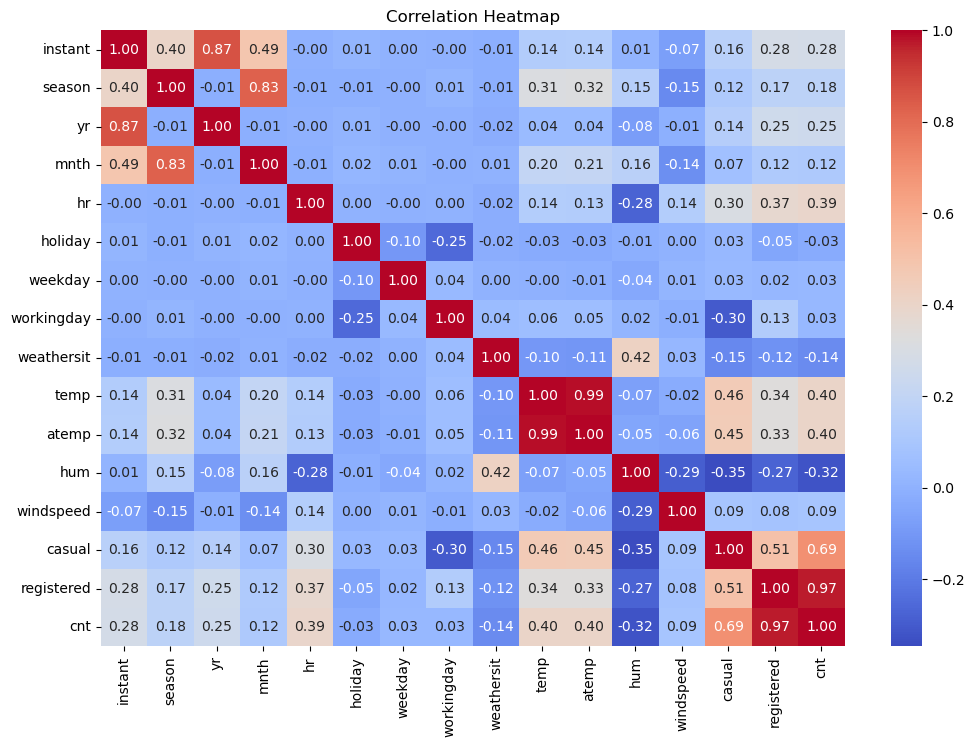

In [78]:
# Plot Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

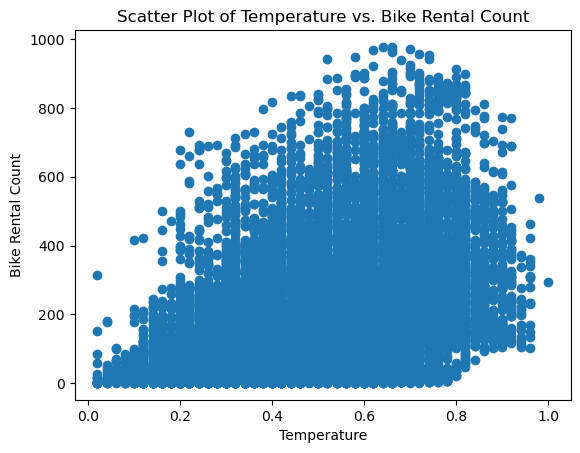

In [79]:
# Analisis Hubungan Antara Variabel
# Scatter Plot Antara Variabel Numerik 'temp' dan 'cnt'

plt.scatter(hour_df['temp'], hour_df['cnt'])
plt.title('Scatter Plot of Temperature vs. Bike Rental Count')
plt.xlabel('Temperature')
plt.ylabel('Bike Rental Count')
plt.show()

# Explore All Data ( day_df & hour_df )

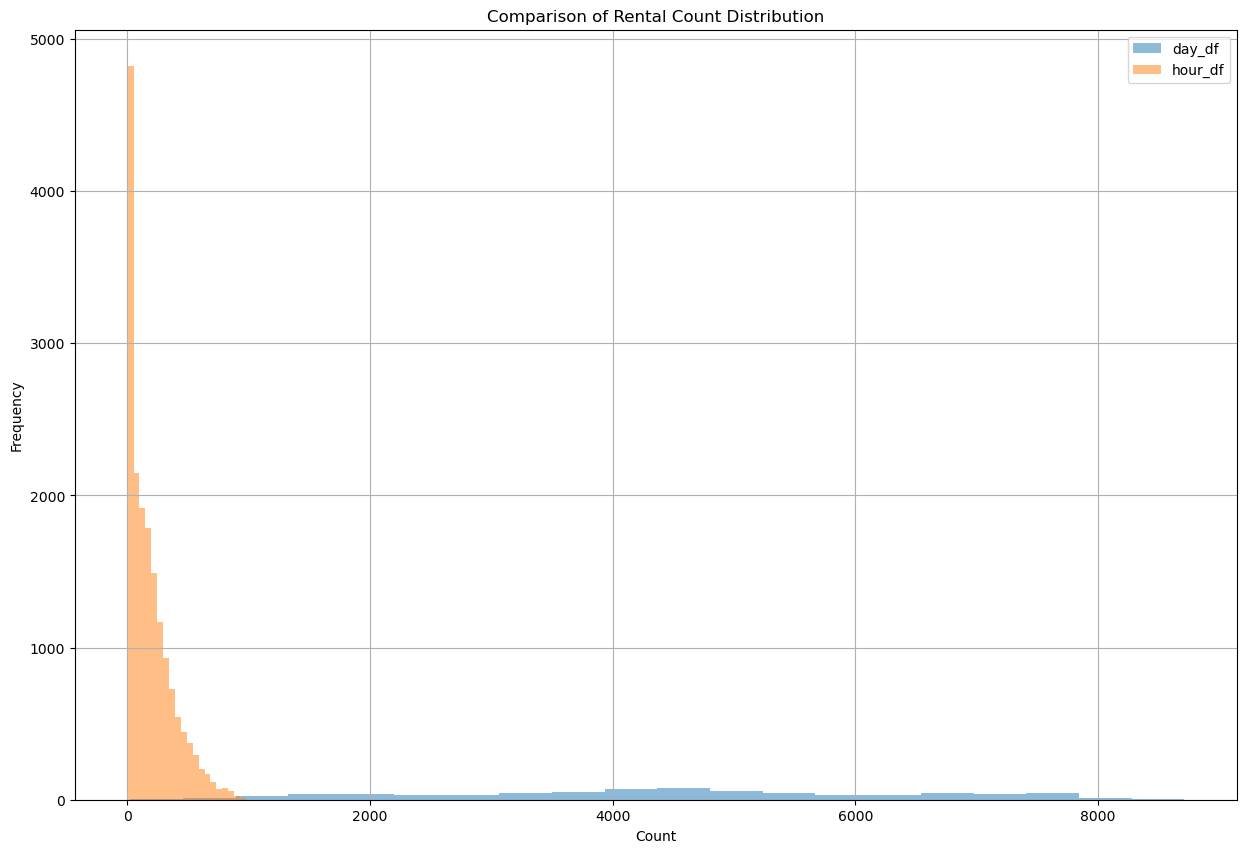

In [80]:
# Membandingkan Distribusi Variabel Antara day_df dan hour_df

plt.figure(figsize=(15, 10))
day_df['cnt'].hist(alpha=0.5, label='day_df', bins=20)
hour_df['cnt'].hist(alpha=0.5, label='hour_df', bins=20)
plt.title('Comparison of Rental Count Distribution')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [81]:
# Menganalisis Korelasi Antara Variabel Yang Sama Dari Kedua Tabel

correlation_day = day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
correlation_hour = hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()

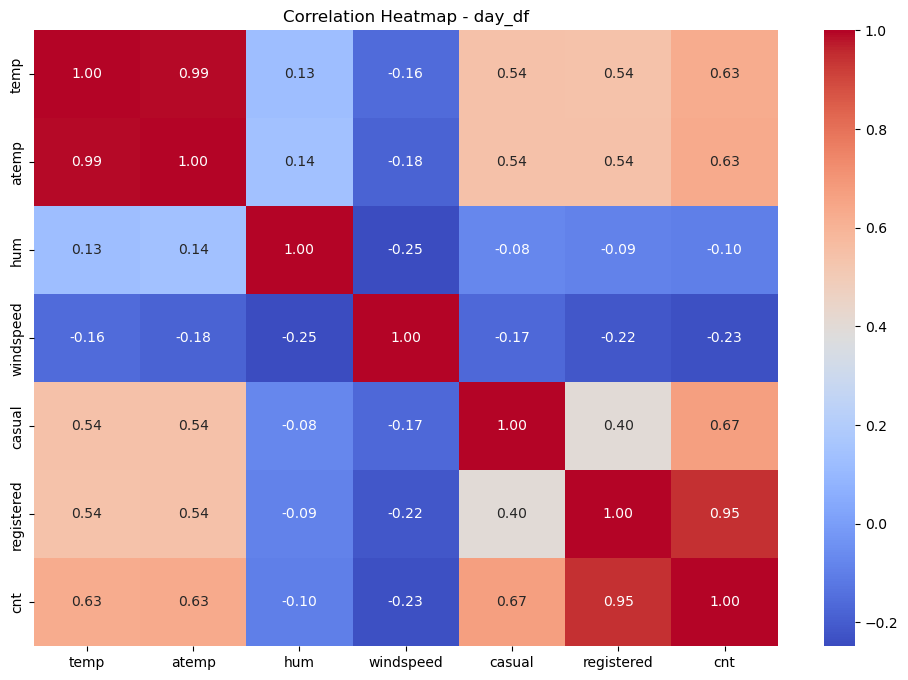

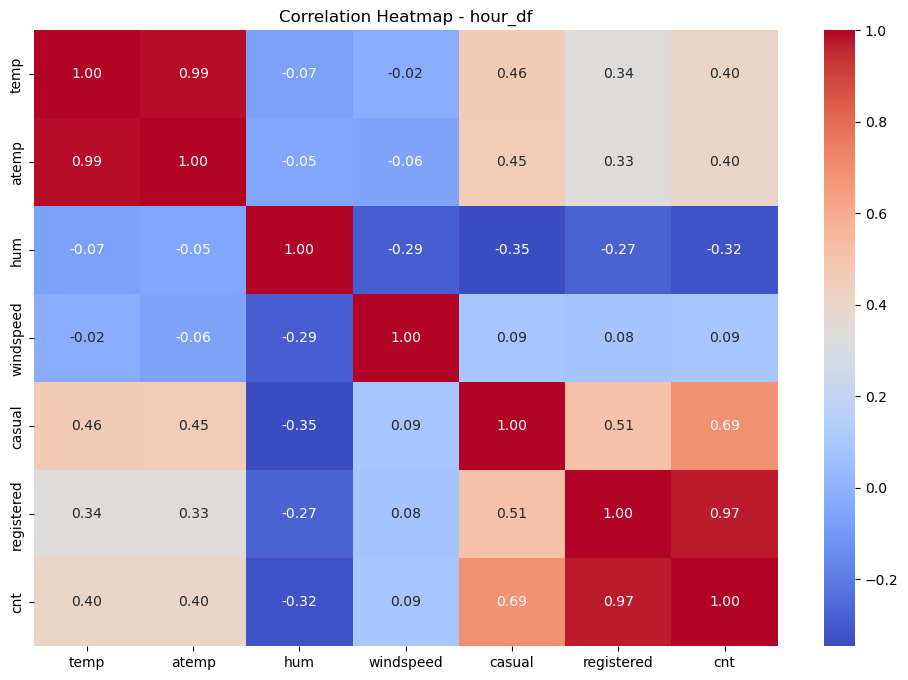

In [82]:
# Visualisasi Heatmap Korelasi

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_day, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - day_df')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_hour, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - hour_df')
plt.show()

In [83]:
# Menggabungkan day_df dan hour_df Berdasarkan Kolom 'dteday'

all_df = pd.merge(left=day_df, right=hour_df, how="inner", on="dteday", suffixes=('_day', '_hour'))

In [84]:
# Menyimpan Gabungan Data Menjadi File CSV

all_df.to_csv('all_data.csv', index=False)

# Visualization & Explanatory Analysis

In [85]:
all_df.sample(5)

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
12466,525,2012-06-08,2,1,6,0,5,1,1,0.649167,...,5,1,1,0.76,0.6667,0.29,0.2836,98,299,397
8168,346,2011-12-12,4,0,12,0,1,1,1,0.238333,...,1,1,1,0.20,0.2273,0.69,0.0896,4,16,20
17008,716,2012-12-16,4,1,12,0,0,0,2,0.362500,...,0,0,2,0.36,0.3485,0.87,0.1343,47,248,295
16126,679,2012-11-09,4,1,11,0,5,1,1,0.361667,...,5,1,1,0.46,0.4545,0.38,0.1642,57,377,434
8199,347,2011-12-13,4,0,12,0,2,1,1,0.282500,...,2,1,1,0.16,0.1667,0.80,0.1642,2,221,223


# Pertanyaan 1 : Bagaimana perilaku pengguna berbeda antara hari kerja dan akhir pekan?

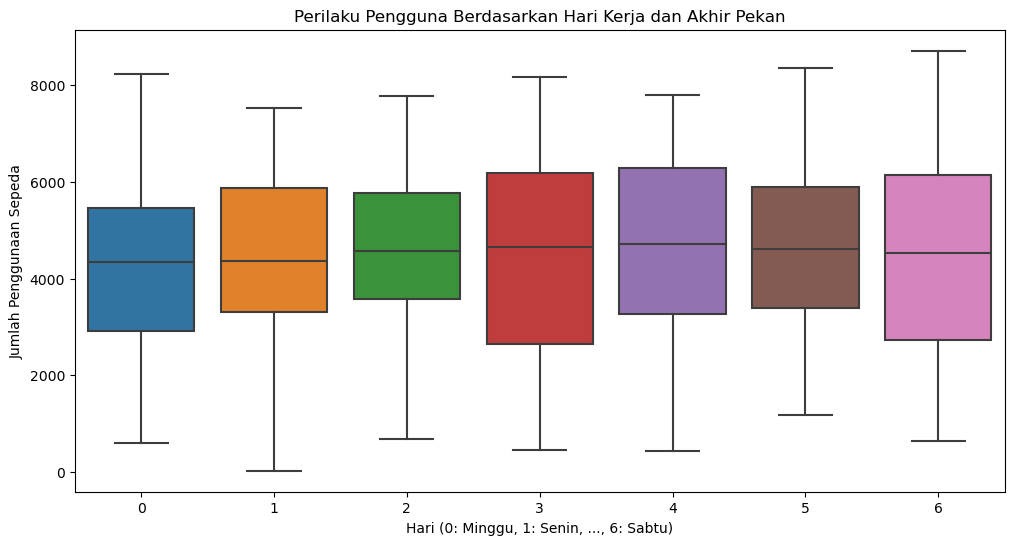

In [86]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='cnt', data=day_df, showfliers=False)
plt.title('Perilaku Pengguna Berdasarkan Hari Kerja dan Akhir Pekan')
plt.xlabel('Hari (0: Minggu, 1: Senin, ..., 6: Sabtu)')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.show()

# Pertanyaan 2 :Bagaimana faktor cuaca seperti suhu, kelembaban, dan kecepatan angin memengaruhi jumlah penggunaan sepeda?

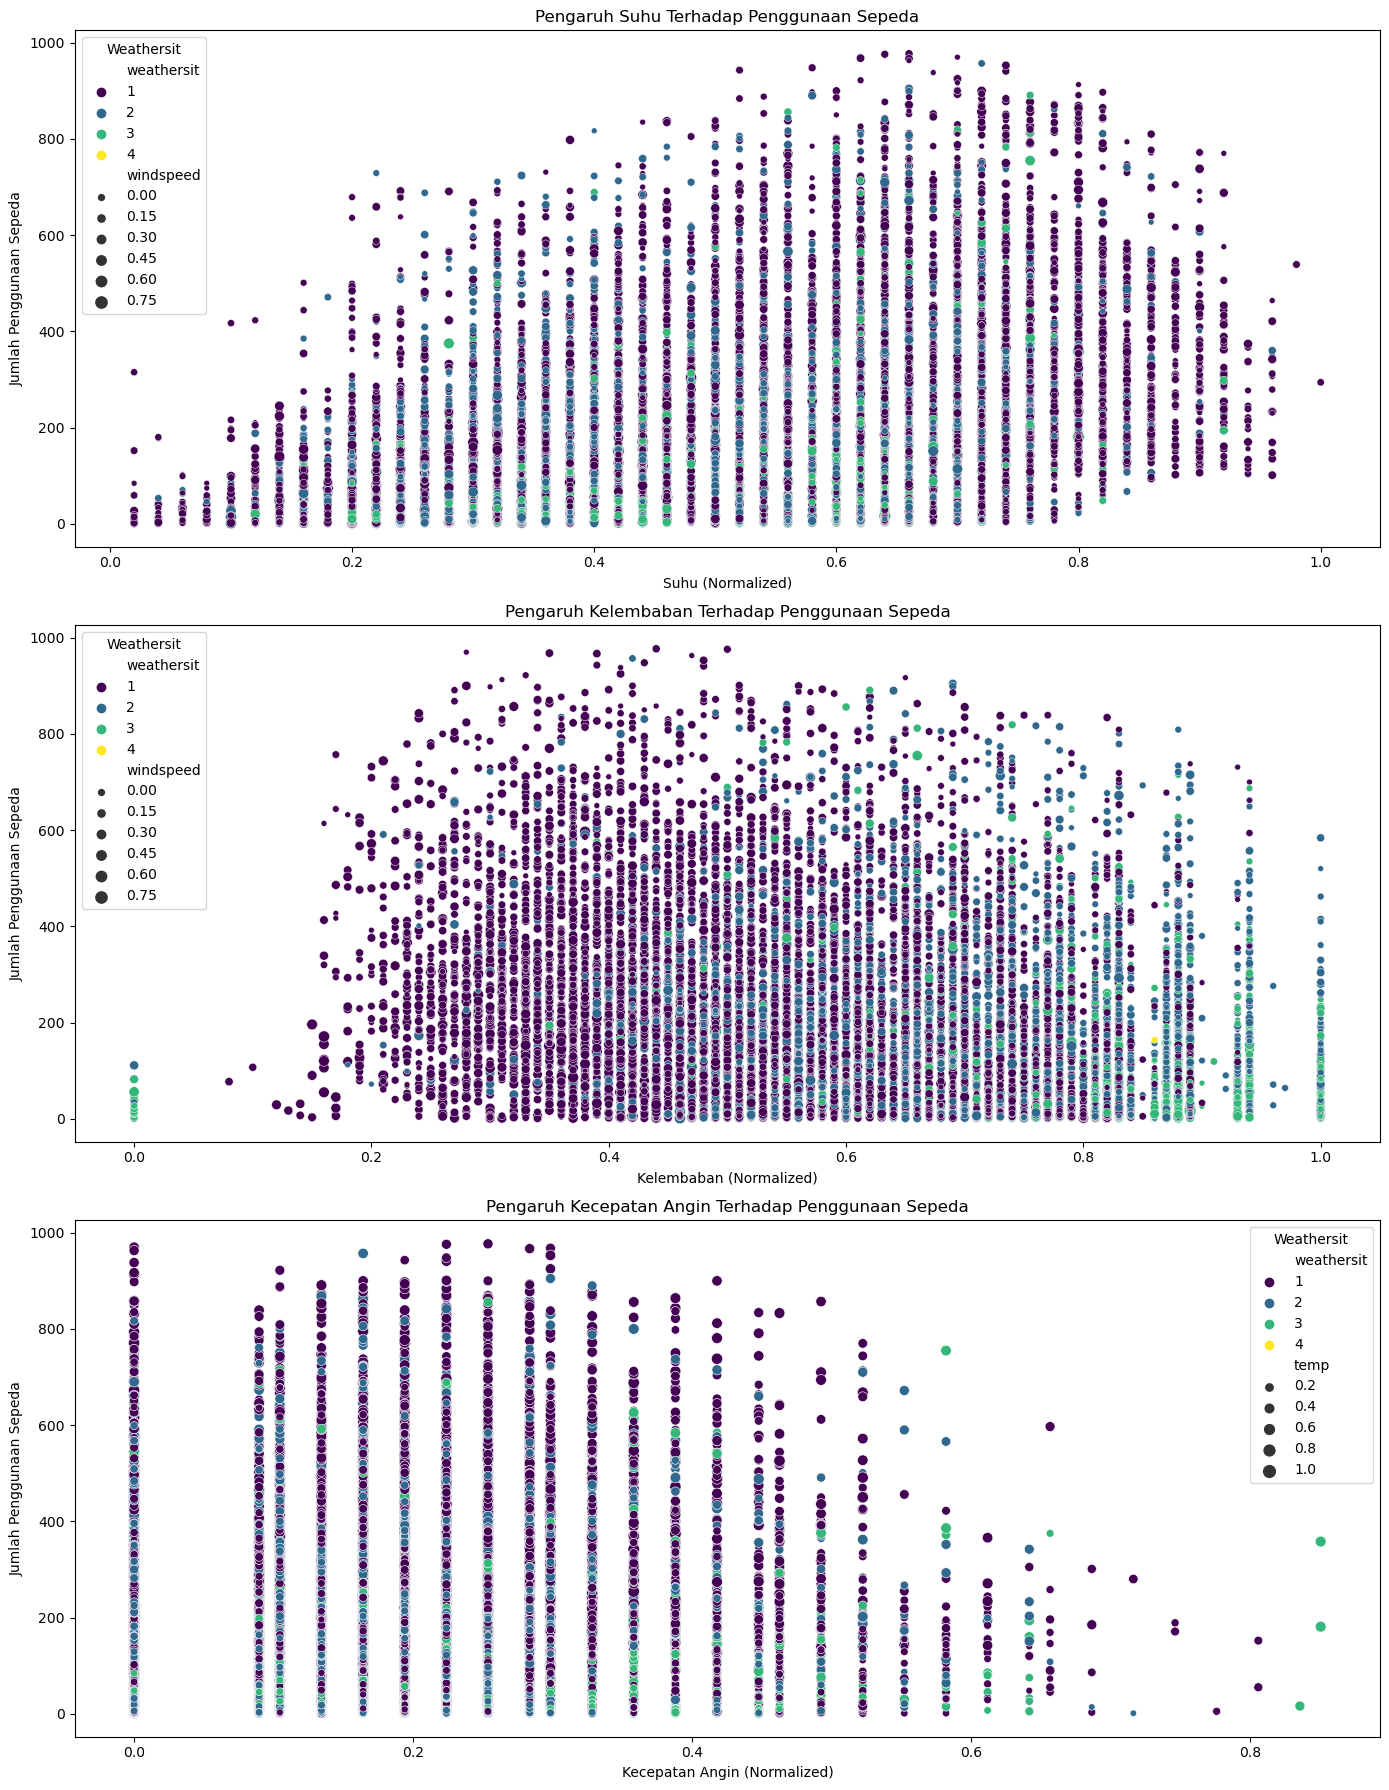

In [87]:
### Visualisasi pengaruh faktor cuaca terhadap penggunaan sepeda
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

### Pengaruh suhu
sns.scatterplot(x='temp', y='cnt', data=hour_df, hue='weathersit', palette='viridis', size='windspeed', ax=axes[0])
axes[0].set_title('Pengaruh Suhu Terhadap Penggunaan Sepeda')
axes[0].set_xlabel('Suhu (Normalized)')
axes[0].set_ylabel('Jumlah Penggunaan Sepeda')
axes[0].legend(title='Weathersit')

### Pengaruh kelembaban
sns.scatterplot(x='hum', y='cnt', data=hour_df, hue='weathersit', palette='viridis', size='windspeed', ax=axes[1])
axes[1].set_title('Pengaruh Kelembaban Terhadap Penggunaan Sepeda')
axes[1].set_xlabel('Kelembaban (Normalized)')
axes[1].set_ylabel('Jumlah Penggunaan Sepeda')
axes[1].legend(title='Weathersit')

### Pengaruh kecepatan angin
sns.scatterplot(x='windspeed', y='cnt', data=hour_df, hue='weathersit', palette='viridis', size='temp', ax=axes[2])
axes[2].set_title('Pengaruh Kecepatan Angin Terhadap Penggunaan Sepeda')
axes[2].set_xlabel('Kecepatan Angin (Normalized)')
axes[2].set_ylabel('Jumlah Penggunaan Sepeda')
axes[2].legend(title='Weathersit')

plt.tight_layout()
plt.show()

In [88]:
### Analisis Korelasi
weather_corr = hour_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

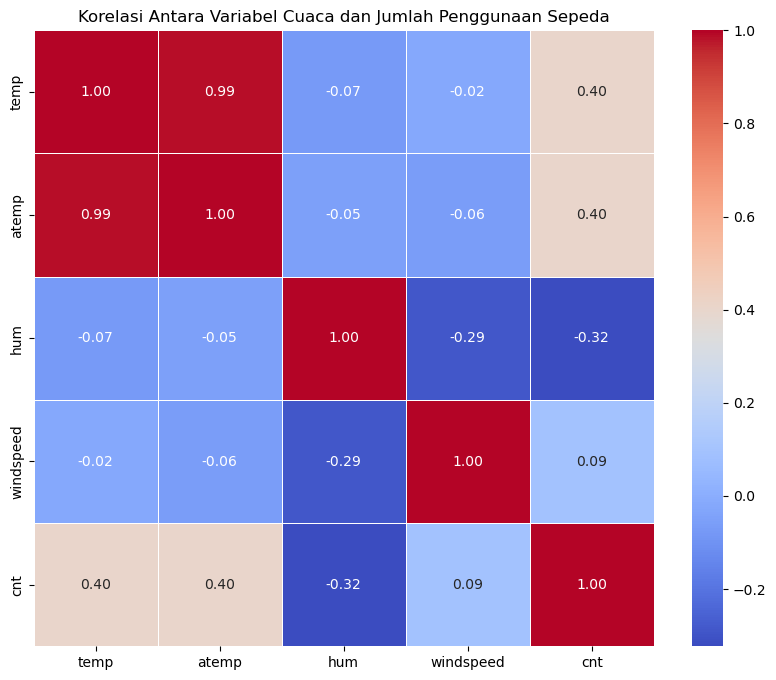

In [89]:
### Visualisasi Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(weather_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antara Variabel Cuaca dan Jumlah Penggunaan Sepeda')
plt.show()

# Conclusion

## Conclusion Pertanyaan 1 :  Bagaimana perilaku pengguna berbeda antara hari kerja dan akhir pekan?

1. Pada hari kerja, terdapat variasi harian yang signifikan dengan beberapa hari memiliki jumlah penggunaan sepeda yang lebih tinggi atau lebih rendah daripada yang lain.

2. Pada akhir pekan, terlihat adanya pola atau perubahan dalam perilaku penggunaan sepeda, yang mungkin terkait dengan kebiasaan pada hari libur.

3. Dapat disimpulkan bahwa terdapat perbedaan yang signifikan dalam perilaku pengguna sepeda antara hari kerja (Senin-Jumat) dan akhir pekan (Sabtu-Minggu). Pada boxplot, terlihat bahwa distribusi jumlah penggunaan sepeda bervariasi di antara hari-hari dalam seminggu.

# Conclusion Pertanyaan 2 : Bagaimana faktor cuaca seperti suhu, kelembaban, dan kecepatan angin memengaruhi jumlah penggunaan sepeda?

1. Terdapat korelasi positif antara suhu dan jumlah penggunaan sepeda. Semakin tinggi suhu, semakin tinggi juga jumlah penggunaan sepeda. Namun, korelasi dengan kelembaban tidak terlalu signifikan.

2. Korelasi antara kecepatan angin dan jumlah penggunaan sepeda terlihat tidak signifikan. Hal ini menunjukkan bahwa kecepatan angin mungkin bukan faktor utama yang memengaruhi perilaku penggunaan sepeda.

3. Dapat disimpulkan bahwa suhu tampaknya menjadi faktor dominan yang memengaruhi jumlah penggunaan sepeda, sementara kelembaban dan kecepatan angin memiliki dampak yang lebih kecil.